In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import sklearn.linear_model as lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn import svm
from numpy import array

%matplotlib inline

data = pd.read_csv("mirror/08_gap-every-five-years.tsv", sep='\t')
data.head()

vars_table = data[['year', 'lifeExp']].sort_values(by=['year'], ascending=True).reset_index(drop=True)
data

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


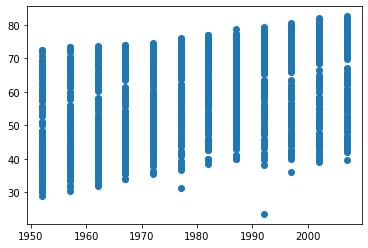

In [2]:
# Exercise 1
plt.plot(data['year'], data['lifeExp'], 'o')

Question 1:
There is a generally increasing positive trend in the graph, meaning that the average life expectancy has increased over the past 50 years. The trend does seem linear.

Question 2:
For the distributions across individual years, after examining the violin plot, the data seems unimodal, and oftentimes very skewed. In the first three violins, they appear more skewed to the right, and slighlty bimodal, but for the rest of them, they are very strongly unimodal, with a gradually increasing left skew.

Question 3:
Although we visually see a strong trend between the two factors, we are not given enough information to prove that the null hypothesis is true. Therefore, I would reject the null hypothesis off of the data we are currently given. 

Question 4:
It would be linear, as the residuals are the differences from a linear violin plot.

Question 5:
It should look linear and centered around 0.


In [3]:
# Exercise 2
reg = linear_model.LinearRegression()
x = [[x] for x in data['year'].values]
x_list = [x for x in data['year'].values]
y = [[y] for y in data['lifeExp'].values]
y_list = [y for y in data['year'].values]
regfit = reg.fit(x, y)
m = regfit.coef_[0]
b = regfit.intercept_
print(f"Regfit: y = {m}x + {b}")

result = sm.ols(formula = 'lifeExp ~ year', data = vars_table).fit()
print(result.summary())


Regfit: y = [0.32590383]x + [-585.65218744]
                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           7.55e-80
Time:                        17:49:39   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

Question 6:
On average, the average life expectancy goes up by about 0.32590383 years every year around the world.


Question 7:
Now that we have the p value, which is at 7.55e-80, we can reject the null hypothesis, as the p value is extremely small. 


Text(0, 0.5, 'Life Expectancy Residuals')

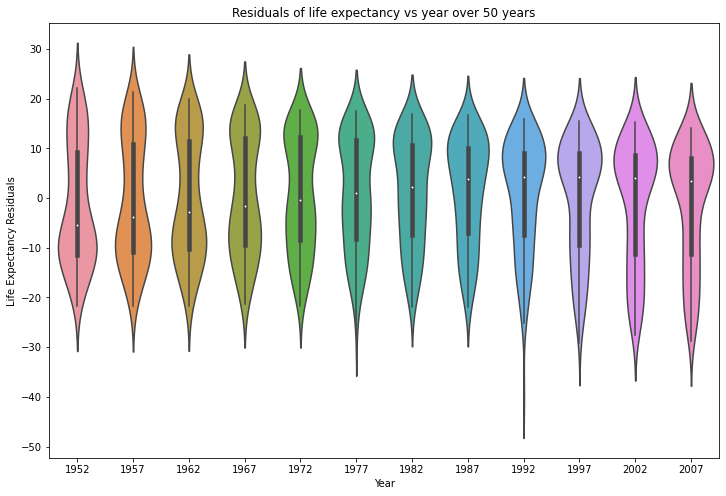

In [13]:
# Exercise 3
vars_table["residual"] = vars_table["lifeExp"] - (vars_table["year"] * m + b)
vars_table

year_residual = []
z = [[z] for z in vars_table['residual'].values]
z_list = [z for z in vars_table['residual'].values]

new_vars_table = vars_table[['year', 'residual']].sort_values(by=['year'], ascending=True).reset_index(drop=True)
new_vars_table

plt.figure(figsize = (12, 8))
sns.violinplot(x = 'year', y = 'residual', data = new_vars_table)
plt.title("Residuals of life expectancy vs year over 50 years")
plt.xlabel("Year")
plt.ylabel("Life Expectancy Residuals")


Question 8:
This matches my expectations, since the previous graph was linear and the trend line also followed suit, it makes sense that this graph is distributed normally.

Text(0, 0.5, 'Life Expectancy Residuals')

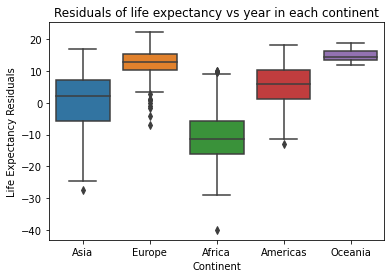

In [22]:
# Exercise 4
data['residual'] = data['lifeExp'] - (data['year'] * m + b)
data

sns.boxplot(x = 'continent', y = 'residual', data = data)
plt.title("Residuals of life expectancy vs year in each continent")
plt.xlabel("Continent")
plt.ylabel("Life Expectancy Residuals")

Question 9:
It does seem like there is a dependence between model residual and continent, as each continent's average residual between life expectancy compared to year looks very distinct. This would suggest that each continent needs to be studied seperately, as there are numerous unique factors that contribute to the average, and as a result, the overall life expectancy across time of human beings could have a high spread. 

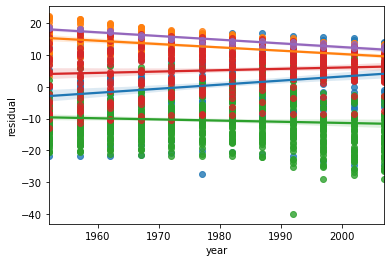

In [61]:
# Exercise 5
continents = [x for x in data['continent'].unique()]
continents


for continent in continents:
    x = []
    y = []
    for index, row in data.iterrows():
        if row[1] == continent:
            x.append(row[2])
            y.append(row[6])
    new_table = pd.DataFrame(list(zip(x, y)), columns = ['year', 'residual'])
    
    # Plot graph from the new table for each continent
    sns.regplot(data = new_table, x = 'year', y = 'residual')
            
    
        


Question 10:
Based on this model, I believe the regression model should include an interaction term because the trends are clearly distinct, meaning each continent has unique factors that influence the average life expectancy every single year, and grouping them up into one big average heavily disregards these important, distinct factors.

In [65]:
# Exercise 6
results = sm.ols(formula = 'lifeExp ~ year * continent', data = data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        02:33:30   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Question 11: Asides from Oceania, all continents had parameters significantly different than zero, due toe their p values being extremely small. However, Oceania does not, as their p values are much larger, 0.287 for continent, and 0.360 for year.

In [68]:
results.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64

Question 12:
Using the params field of the OLSResults object, we can extract the m values, or the slope of the trend line, for each individual country. As a result, we can see the following:
Average life expectancy increases by:
- 0.289529 every year in the Americas
- 0.078122 every year in Asia
Average life expectancy decreases by:
- 0.067597 in Europe
- 0.079257 in Oceania

Text(0, 0.5, 'Life Expectancy Residuals')

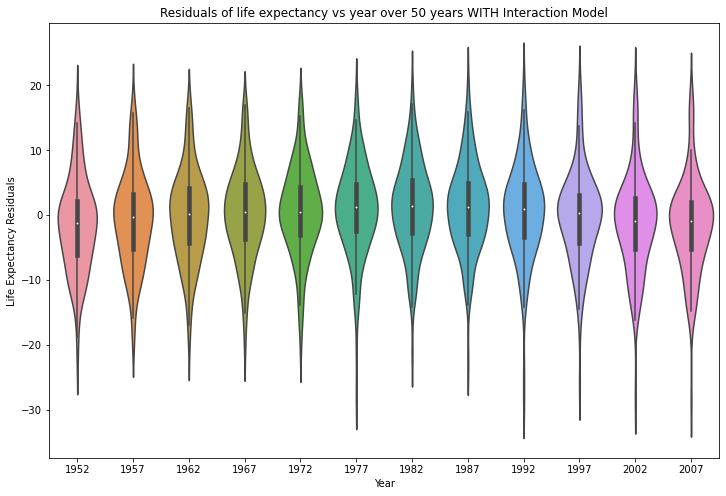

In [82]:
# Exercise 7
predict = results.predict()
predict

data['prediction'] = pd.Series(predict, index = range(0, len(data.index)))
data['new_residual'] = data['lifeExp'] - data['prediction']

# Reusing the violin plot code from before
plt.figure(figsize = (12, 8))
sns.violinplot(x = 'year', y = 'new_residual', data = data)
plt.title("Residuals of life expectancy vs year over 50 years WITH Interaction Model")
plt.xlabel("Year")
plt.ylabel("Life Expectancy Residuals")


Comments:
Like the before violin plot, it fits the assumption that it would be normally distributed because the trend lines follow the respective continent graphs well, so the residuals would average out in a unimodal, normally distributed plot. 

PART 2

[1.         0.93333333 1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]
[1]
[1]
[2]
[1]
[1.         0.93333333 1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]


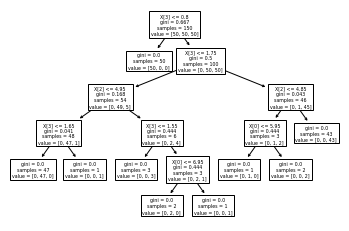

In [38]:
data = datasets.load_iris()
cvs = svm.SVC(kernel = 'linear', C = 1, random_state = 42)

# Decision tree algorithm
x, y = data.data, data.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
scores = cross_val_score(cvs, x, y, cv = 10)
print(scores)

tree.plot_tree(clf)
print(clf.predict([[5, 1, 1, 5]]))
print(clf.predict([[1, 1, 1, 1]]))

# LDA
clf = LinearDiscriminantAnalysis()
clf.fit(x, y)
print(clf.predict([[5, 1, 1, 5]]))
print(clf.predict([[1, 1, 1, 1]]))


scores = cross_val_score(cvs, x, y, cv = 10)
print(scores)

Part 2 Writeup

The data set I am using for my algorithm analysis is the iris data set, loaded and returned by the load_iris() command from the sklearn.datasets module. In my comparisons, I will be comparing the classifcation of the sample data, so in this case, the classification of the type of iris (setosa, versicolour, and virginica), using a sample sepal and petal length and width. 

To do this comparison, I loaded the iris data into a table called data, then took two seperate lists, x and y, from the data to compare and create a decision tree model and LDA model. Then, using the model, I called the predict function with parameters 5, 1, 1, and 5 as sepal and petal lengths and widths, and using the models existing, trained data, it predicted the classification of the flowers. In this case, both of them predicted different classifications. However, they predicted the same thing when I used [1, 1, 1, 1] as parameters. 
